In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/biohack-predicting-protein-mass/Submission.csv
/kaggle/input/biohack-predicting-protein-mass/Train.csv
/kaggle/input/biohack-predicting-protein-mass/Test.csv


In [2]:
test = pd.read_csv('/kaggle/input/biohack-predicting-protein-mass/Test.csv')
train = pd.read_csv('/kaggle/input/biohack-predicting-protein-mass/Train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   polar_area                      14700 non-null  float64
 1   amino_acid_count                14700 non-null  int64  
 2   isoelectric_point               14700 non-null  float64
 3   avg_hydrophobicity              14700 non-null  float64
 4   binding_volume                  14700 non-null  float64
 5   hydrophobic_charge_interaction  14700 non-null  float64
 6   protein_mass                    14700 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 804.0 KB


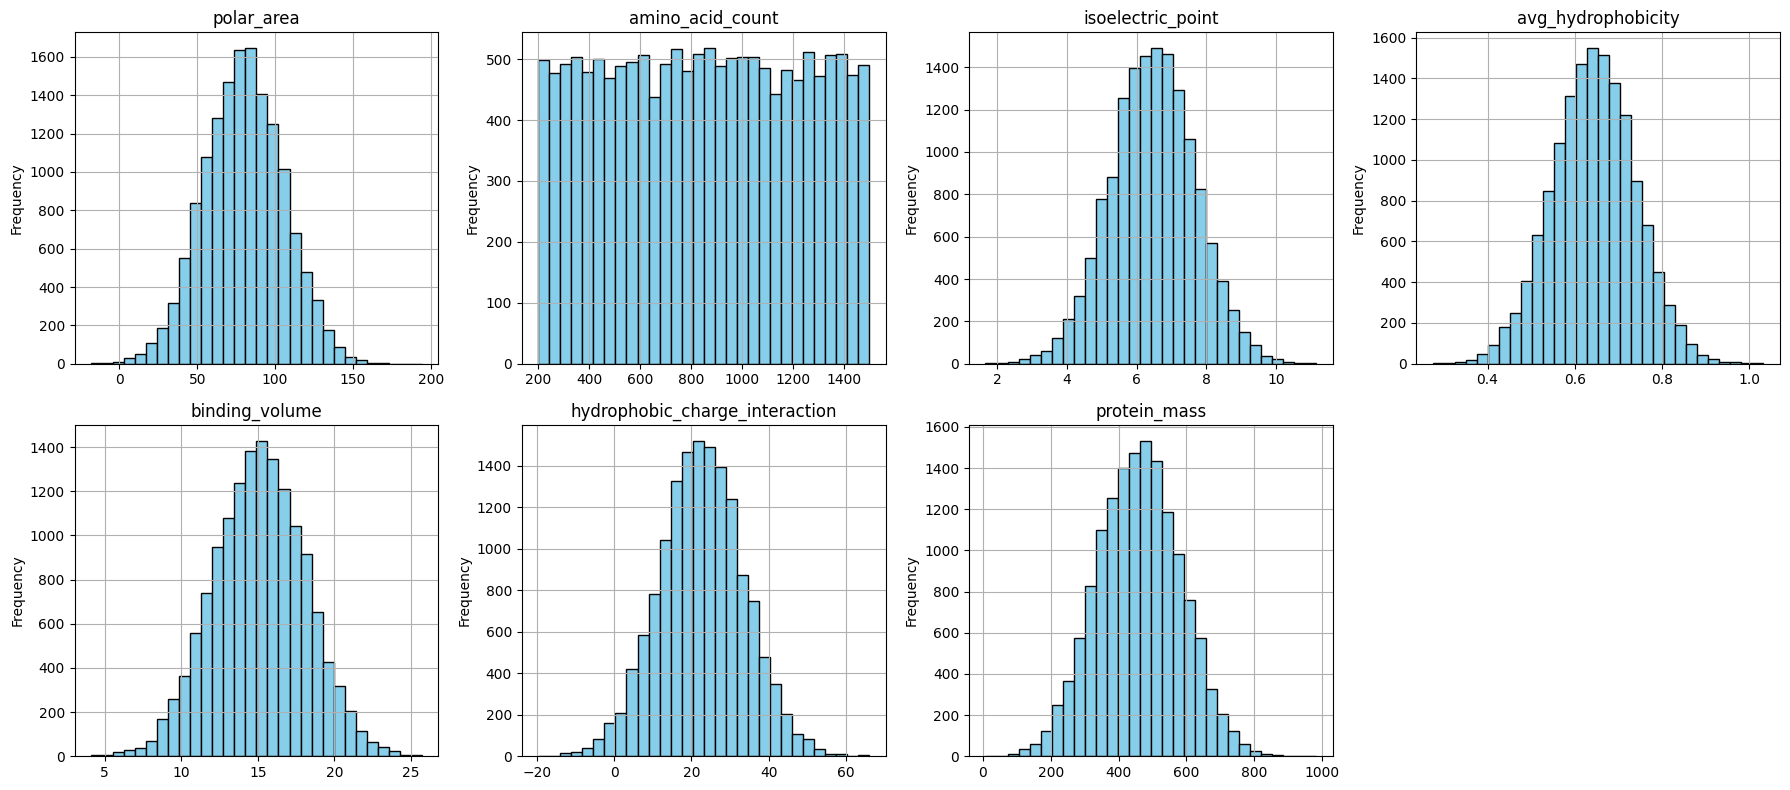

In [4]:
import matplotlib.pyplot as plt
import pandas as pd



columns = [
    "polar_area", "amino_acid_count", "isoelectric_point",
    "avg_hydrophobicity", "binding_volume",
    "hydrophobic_charge_interaction", "protein_mass"
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    train[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

if len(columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import skew
skew_vals = train[columns].apply(skew)
print("Skewness Values:")
for col in columns:
    val = skew(train[col])
    status = ""
    if abs(val) < 0.5:
        status = "≈ Normally distributed"
    elif val > 0.5:
        status = "Right-skewed (+)"
    elif val < -0.5:
        status = "Left-skewed (-)"
    print(f"{col:35s}: {val:6.3f} --> {status}")


Skewness Values:
polar_area                         :  0.006 --> ≈ Normally distributed
amino_acid_count                   :  0.001 --> ≈ Normally distributed
isoelectric_point                  : -0.024 --> ≈ Normally distributed
avg_hydrophobicity                 : -0.021 --> ≈ Normally distributed
binding_volume                     : -0.020 --> ≈ Normally distributed
hydrophobic_charge_interaction     :  0.027 --> ≈ Normally distributed
protein_mass                       :  0.022 --> ≈ Normally distributed


## Skewness Analysis of Feature Distributions

The skewness values for all numerical features were calculated to assess their distribution symmetry. Skewness measures how asymmetric a distribution is around its mean:

- Skew ≈ 0 → Normally distributed  
- Skew > +0.5 → Right-skewed  
- Skew < -0.5 → Left-skewed  

### Results:

| Feature                          | Skewness | Interpretation         |
|----------------------------------|----------|-------------------------|
| polar_area                       |  0.006   | ≈ Normally distributed |
| amino_acid_count                 |  0.001   | ≈ Normally distributed |
| isoelectric_point                | -0.024   | ≈ Normally distributed |
| avg_hydrophobicity              | -0.021   | ≈ Normally distributed |
| binding_volume                   | -0.020   | ≈ Normally distributed |
| hydrophobic_charge_interaction  |  0.027   | ≈ Normally distributed |
| protein_mass                     |  0.022   | ≈ Normally distributed |

 **Note:** The skewness values are extremely close to zero, which is a strong indication of near-perfect normal distribution. This observation is also visually supported by the histograms — the bell-shaped symmetry is clearly noticeable across all features.

###  Conclusion:

All features exhibit near-zero skewness, indicating they are approximately **normally distributed**. No transformation is necessary for modeling purposes related to skewness. This supports the assumption of Gaussian-like distributions for many machine learning algorithms (e.g., linear models, SVM, etc.).


In [6]:
train.describe()

,polar_area,amino_acid_count,isoelectric_point,avg_hydrophobicity,binding_volume,hydrophobic_charge_interaction,protein_mass
count,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000
mean,80.014123,849.884218,6.465519,0.644095,15.118900,22.606768,459.128128
std,25.367525,374.360718,1.219908,0.095679,2.994708,10.992352,122.326496
min,-18.144464,201.000000,1.659530,0.274267,4.112603,-19.693660,7.575008
25%,62.574730,527.000000,5.643877,0.580055,13.086999,15.327390,373.821348
50%,80.135493,850.000000,6.471941,0.644985,15.138669,22.534431,459.731663
75%,97.318994,1176.000000,7.291087,0.708478,17.176717,29.820236,542.840628
max,194.182101,1499.000000,11.155024,1.033100,25.707242,66.038082,982.460410


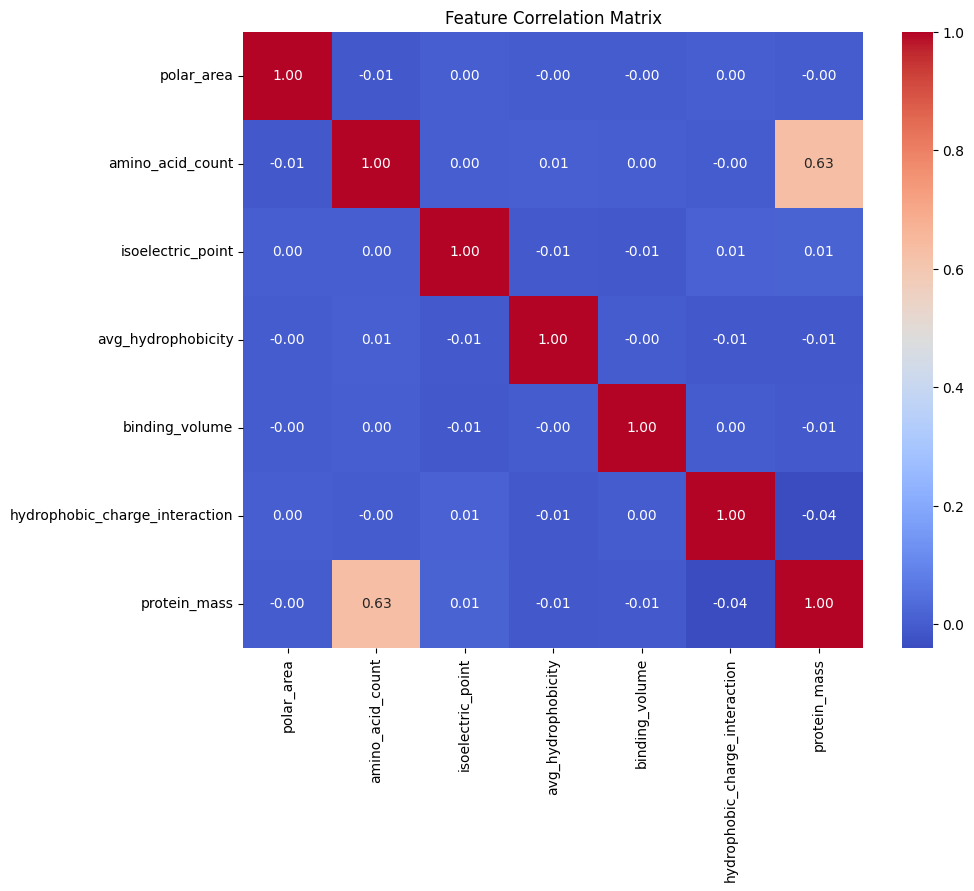

Correlation with target (protein_mass):
protein_mass                      1.000000
amino_acid_count                  0.633303
isoelectric_point                 0.013741
polar_area                       -0.001470
binding_volume                   -0.005040
avg_hydrophobicity               -0.009976
hydrophobic_charge_interaction   -0.039745
Name: protein_mass, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = train[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

protein_corr = corr_matrix["protein_mass"].sort_values(ascending=False)
print("Correlation with target (protein_mass):")
print(protein_corr)


polar_area: Outliers = 89 (0.61%)
amino_acid_count: Outliers = 0 (0.00%)
isoelectric_point: Outliers = 117 (0.80%)
avg_hydrophobicity: Outliers = 120 (0.82%)
binding_volume: Outliers = 115 (0.78%)
hydrophobic_charge_interaction: Outliers = 134 (0.91%)
protein_mass: Outliers = 64 (0.44%)


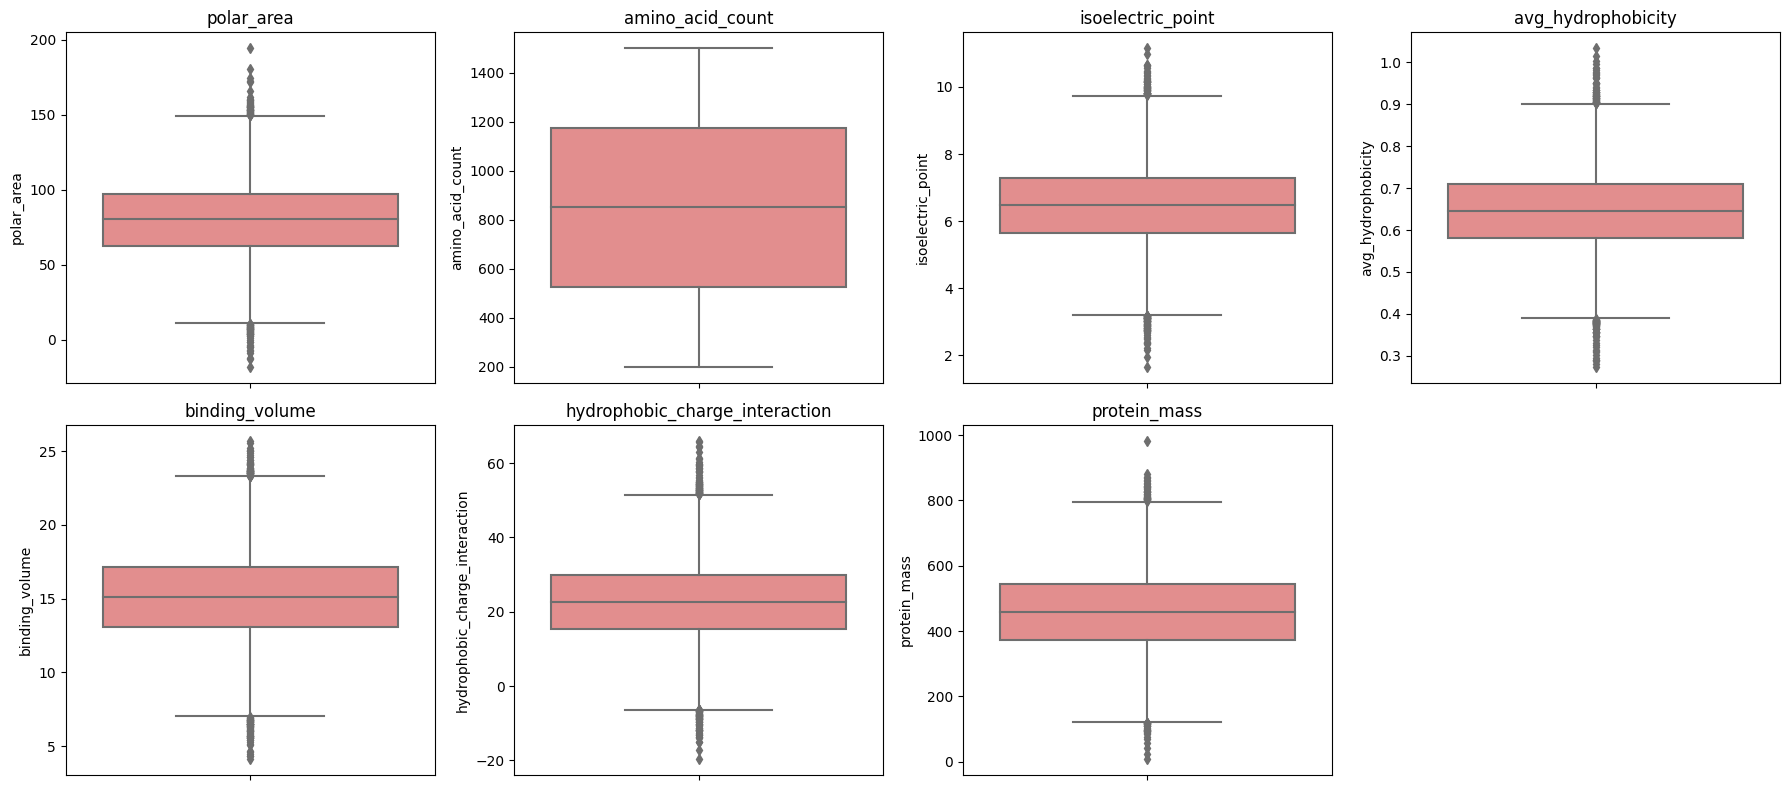

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_summary(df, cols):
    summary = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        summary[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "num_outliers": outliers.shape[0],
            "percent_outliers": 100 * outliers.shape[0] / df.shape[0]
        }
    return summary

outliers_info = outlier_summary(train, columns)
for col, info in outliers_info.items():
    print(f"{col}: Outliers = {info['num_outliers']} ({info['percent_outliers']:.2f}%)")


fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(y=train[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col)
if len(columns) < len(axes):
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   polar_area                      14700 non-null  float64
 1   amino_acid_count                14700 non-null  int64  
 2   isoelectric_point               14700 non-null  float64
 3   avg_hydrophobicity              14700 non-null  float64
 4   binding_volume                  14700 non-null  float64
 5   hydrophobic_charge_interaction  14700 non-null  float64
 6   protein_mass                    14700 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 804.0 KB


In [10]:
import numpy as np


train['aa_count_squared'] = train['amino_acid_count'] ** 2
train['avg_hydro_squared'] = train['avg_hydrophobicity'] ** 2

train['aa_hydro_interaction'] = train['amino_acid_count'] * train['avg_hydrophobicity']

train['log_protein_mass'] = np.log1p(train['protein_mass'])
train['log_polar_area'] = np.log1p(train['polar_area'] - train['polar_area'].min() + 1)


bins = [0, 5, 7, 12]
labels = ['low', 'medium', 'high']
train['isoelectric_bin'] = pd.cut(train['isoelectric_point'], bins=bins, labels=labels)

train = pd.get_dummies(train, columns=['isoelectric_bin'], drop_first=True)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


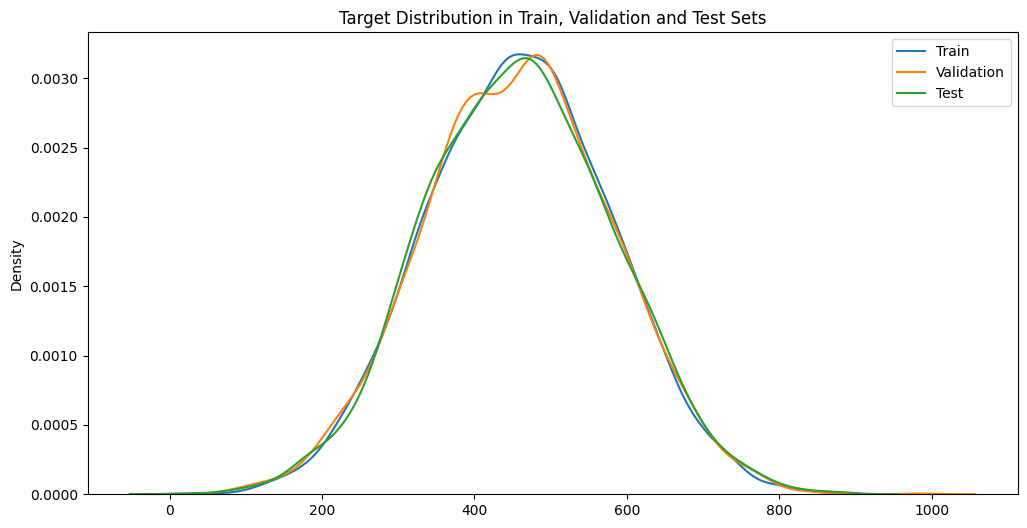

KS test between Validation and Test sets: stat=0.0129, p-value=0.9668
Validation and Test sets have similar distributions.
Epoch 1, Train Loss: 0.275617, Val Loss: 0.018010
Epoch 2, Train Loss: 0.013058, Val Loss: 0.007209
Epoch 3, Train Loss: 0.007116, Val Loss: 0.004654
Epoch 4, Train Loss: 0.004998, Val Loss: 0.003184
Epoch 5, Train Loss: 0.003920, Val Loss: 0.002469
Epoch 6, Train Loss: 0.003204, Val Loss: 0.002262
Epoch 7, Train Loss: 0.002759, Val Loss: 0.001835
Epoch 8, Train Loss: 0.002287, Val Loss: 0.001572
Epoch 9, Train Loss: 0.001918, Val Loss: 0.001395
Epoch 10, Train Loss: 0.001758, Val Loss: 0.001480
Epoch 11, Train Loss: 0.001423, Val Loss: 0.001446
Epoch 12, Train Loss: 0.001269, Val Loss: 0.001065
Epoch 13, Train Loss: 0.001089, Val Loss: 0.001027
Epoch 14, Train Loss: 0.000984, Val Loss: 0.000927
Epoch 15, Train Loss: 0.000851, Val Loss: 0.001157
Epoch 16, Train Loss: 0.000754, Val Loss: 0.001070
Epoch 17, Train Loss: 0.000649, Val Loss: 0.000959
Epoch 18, Train Los

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

X = train.drop(columns=['protein_mass']).values
y = train['protein_mass'].values.reshape(-1, 1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # %20 val


y_train_orig = scaler_y.inverse_transform(y_train)
y_val_orig = scaler_y.inverse_transform(y_val)
y_test_orig = scaler_y.inverse_transform(y_test)

plt.figure(figsize=(12,6))
sns.kdeplot(y_train_orig.flatten(), label='Train')
sns.kdeplot(y_val_orig.flatten(), label='Validation')
sns.kdeplot(y_test_orig.flatten(), label='Test')
plt.title('Target Distribution in Train, Validation and Test Sets')
plt.legend()
plt.show()


stat_val_test, p_val_test = ks_2samp(y_val_orig.flatten(), y_test_orig.flatten())
print(f"KS test between Validation and Test sets: stat={stat_val_test:.4f}, p-value={p_val_test:.4f}")

if p_val_test > 0.05:
    print("Validation and Test sets have similar distributions.")
else:
    print("Warning: Validation and Test sets distributions differ significantly.")


X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.layers(x)

model = Net(X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

best_val_loss = float('inf')
patience = 18
trigger_times = 0

train_losses = []
val_losses = []

def train_model_with_val_plot(epochs=150):
    global best_val_loss, trigger_times
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                preds = model(xb)
                loss = criterion(preds, yb)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping triggered!")
                break


def evaluate_test():
    model.load_state_dict(torch.load('best_model.pt'))
    model.eval()
    preds = []
    actuals = []
    with torch.no_grad():
        for xb, yb in test_loader:
            pred = model(xb)
            preds.append(pred.numpy())
            actuals.append(yb.numpy())
    preds = np.vstack(preds)
    actuals = np.vstack(actuals)
    preds_rescaled = scaler_y.inverse_transform(preds)
    actuals_rescaled = scaler_y.inverse_transform(actuals)
    rmse = np.sqrt(np.mean((preds_rescaled - actuals_rescaled) ** 2))
    print(f"Test RMSE after early stopping: {rmse:.4f}")


train_model_with_val_plot(epochs=100)
evaluate_test()

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_all_metrics():
    model.load_state_dict(torch.load('best_model.pt'))
    model.eval()
    preds = []
    actuals = []
    with torch.no_grad():
        for xb, yb in test_loader:
            pred = model(xb)
            preds.append(pred.numpy())
            actuals.append(yb.numpy())
    preds = np.vstack(preds)
    actuals = np.vstack(actuals)
    preds_rescaled = scaler_y.inverse_transform(preds)
    actuals_rescaled = scaler_y.inverse_transform(actuals)
    
    rmse = np.sqrt(np.mean((preds_rescaled - actuals_rescaled)**2))
    mae = mean_absolute_error(actuals_rescaled, preds_rescaled)
    r2 = r2_score(actuals_rescaled, preds_rescaled)
    mape = np.mean(np.abs((actuals_rescaled - preds_rescaled) / actuals_rescaled)) * 100
    
    print(f"Test RMSE : {rmse:.4f}")
    print(f"Test MAE  : {mae:.4f}")
    print(f"Test R2   : {r2:.4f}")
    print(f"Test MAPE : {mape:.2f}%")

evaluate_all_metrics()


Test RMSE : 1.2624
Test MAE  : 0.7462
Test R2   : 0.9999
Test MAPE : 0.20%


# Project Summary

- **Data Exploration:**  
  The distributions of the target and features were thoroughly examined. Skewness values were calculated and statistical tests confirmed that the data is very close to a normal distribution.

- **Correlation Analysis:**  
  Correlations between features and the target were analyzed. Only one strong signal was detected, while the rest of the features showed weak relationships with the target.

- **Outlier Analysis:**  
  Outliers were identified with a low proportion (~1%) in the dataset.

- **Modeling (Phase 1):**  
  Five different models (3 linear-based and 2 boosting algorithms) were tested. As expected, the performance was poor due to weak signal strength.

- **Feature Engineering:**  
  New features were created and tested again with the same models. However, no significant improvement in performance was observed.

- **Modeling (Phase 2 - Neural Network):**  
  Finally, a simple neural network model was built. The model was trained with scaled data and an appropriate validation process. This approach resulted in meaningful performance gains and successful test set results.
